In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('C:/Users/Gabriel/Pasta/Machine Learning/BINÁRIO_HRV.csv')

In [3]:
df

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,0.03,87,35,1.660000,69.600000,25.257657,49.5922,4.0768,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,0.00,92,50,1.590000,98.700000,39.041177,48.4985,6.3788,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,0.00,92,27,1.800000,91.000000,28.086420,51.0391,14.4829,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,1.37,41,61,1.590000,103.700000,41.018947,60.8169,5.6235,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,0.07,88,26,1.649234,59.700000,21.948760,47.7805,1.4780,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,APNEICO,117.50,34.30,69,63,1.620000,89.500000,34.103033,54.1595,13.1081,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,APNEICO,72.00,68.40,67,64,1.640000,127.000000,47.218917,64.2736,1.0004,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,APNEICO,33.80,1.80,82,51,1.650000,94.200000,34.600551,48.8423,9.6049,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,APNEICO,34.30,4.60,83,59,1.649234,89.262007,32.817260,62.6354,5.1821,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [4]:
#separando conjunto de teste e de treino
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
train_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,APNEICO,36.3,23.6,75,67,1.61,76.0,29.319856,75.0727,4.2549,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,NORMAL,14.4,14.4,81,51,1.52,48.0,20.775623,69.9003,1.7170,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,APNEICO,49.2,10.8,77,70,1.64,69.0,25.654372,50.9938,12.7780,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,NORMAL,5.0,0.2,87,36,1.69,74.0,25.909457,54.0109,3.0068,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,NORMAL,14.9,1.4,83,27,1.55,70.0,29.136316,50.3281,5.6408,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0


In [6]:
test_set.head()

,CLASSE,IAH,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
84,NORMAL,6.3,0.0,90,42,1.610000,108.000000,41.665059,54.4808,6.0207,...,-6.1145,6.4501,51.3422,52.2414,0.4297,27.6741,59.3422,12.9837,1.0,0.0
259,APNEICO,55.5,2.4,85,54,1.560000,77.300000,31.763642,59.7655,5.2408,...,-6.0373,6.1587,50.8726,51.4137,0.4595,23.5269,56.0213,20.4518,1.0,0.0
45,NORMAL,2.2,2.0,82,53,1.640000,65.000000,24.167162,58.2716,5.4463,...,-7.5442,7.9502,51.4894,51.6891,0.4140,17.6156,60.0317,22.3527,1.0,0.0
176,APNEICO,26.6,9.2,70,65,1.650000,122.000000,44.811754,59.9173,1.7589,...,-9.5779,6.8927,48.0135,48.4821,-0.1614,9.4193,68.5894,21.9913,1.0,0.0
143,APNEICO,19.3,0.0,91,66,1.649234,89.262007,32.817260,47.7825,24.3318,...,-7.1254,10.2476,57.5344,61.9283,3.2136,44.2501,35.7581,19.9918,0.0,1.0


In [7]:
y_T = train_set['CLASSE'].copy()
X_T = train_set.iloc[:, 2:].copy()
y_T.value_counts()

CLASSE
APNEICO    129
NORMAL      74
Name: count, dtype: int64

In [8]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
258,23.60,75,67,1.61,76.0,29.319856,75.0727,4.2549,11.3053,39.4062,...,-1.2289,1.3699,51.0043,51.3277,0.2126,23.9461,42.7151,33.3388,1.0,0.0
86,14.40,81,51,1.52,48.0,20.775623,69.9003,1.7170,10.4227,64.2845,...,-7.1137,6.5278,47.4961,46.7781,-0.5562,5.5659,56.1571,38.2771,1.0,0.0
229,10.80,77,70,1.64,69.0,25.654372,50.9938,12.7780,34.7683,39.3050,...,-9.6844,9.9350,51.1953,50.8643,0.1930,31.9211,52.4566,15.6223,0.0,1.0
92,0.20,87,36,1.69,74.0,25.909457,54.0109,3.0068,41.3305,46.3030,...,-11.9485,10.7005,48.5700,51.0898,0.2328,16.2400,69.8136,13.9465,0.0,1.0
97,1.40,83,27,1.55,70.0,29.136316,50.3281,5.6408,50.0402,32.0461,...,-6.2342,8.9840,51.3459,52.4776,0.4417,29.3564,58.4494,12.1942,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,18.39,49,32,1.60,123.7,48.320312,52.5720,8.5143,39.1033,38.5719,...,-9.0357,8.4255,48.2910,49.9403,-0.0504,25.6497,54.3417,20.0087,1.0,0.0
71,18.70,73,56,1.56,85.0,34.927679,61.2185,3.0387,20.9251,65.3840,...,-11.6971,11.4989,49.8138,51.2127,0.4347,9.1912,67.6111,23.1977,1.0,0.0
106,0.70,79,47,1.48,70.0,31.957633,58.2807,2.5312,33.7759,50.0790,...,-7.9992,7.7740,52.0880,53.6257,0.7734,13.8376,66.4834,19.6790,1.0,0.0
270,99.70,53,40,1.85,188.0,54.930606,61.2457,4.1517,27.5211,48.8306,...,-5.0520,5.8209,52.2840,52.9548,0.4492,16.9553,61.9908,21.0539,0.0,1.0


In [9]:
from sklearn.experimental import enable_iterative_imputer

In [10]:
from imblearn.over_sampling import SMOTE
#Realiza o over-sampling
smote = SMOTE()
from sklearn.impute import IterativeImputer as imputer
X_T, y_T = smote.fit_resample(train_set.iloc[:, 2:], train_set['CLASSE'],)
from collections import Counter
print(y_T.value_counts())

CLASSE
APNEICO    129
NORMAL     129
Name: count, dtype: int64


In [11]:
X_T

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,23.600000,75,67,1.610000,76.000000,29.319856,75.072700,4.254900,11.305300,39.406200,...,-1.228900,1.369900,51.004300,51.327700,0.212600,23.946100,42.715100,33.338800,1.000000,0.000000
1,14.400000,81,51,1.520000,48.000000,20.775623,69.900300,1.717000,10.422700,64.284500,...,-7.113700,6.527800,47.496100,46.778100,-0.556200,5.565900,56.157100,38.277100,1.000000,0.000000
2,10.800000,77,70,1.640000,69.000000,25.654372,50.993800,12.778000,34.768300,39.305000,...,-9.684400,9.935000,51.195300,50.864300,0.193000,31.921100,52.456600,15.622300,0.000000,1.000000
3,0.200000,87,36,1.690000,74.000000,25.909457,54.010900,3.006800,41.330500,46.303000,...,-11.948500,10.700500,48.570000,51.089800,0.232800,16.240000,69.813600,13.946500,0.000000,1.000000
4,1.400000,83,27,1.550000,70.000000,29.136316,50.328100,5.640800,50.040200,32.046100,...,-6.234200,8.984000,51.345900,52.477600,0.441700,29.356400,58.449400,12.194200,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,7.886370,58,62,1.628875,69.240301,26.208075,50.696419,11.899170,38.631136,35.008592,...,-6.685386,9.694454,51.345524,54.892579,1.146157,28.093866,52.096637,19.809498,1.000000,0.000000
254,1.157214,60,47,1.618814,78.720123,29.966383,48.469670,12.392333,41.531877,34.429767,...,-7.402866,10.306465,51.327635,55.004288,1.173024,29.436711,53.987387,16.575902,0.617857,0.382143
255,0.269231,87,42,1.833880,100.084494,29.333211,60.387557,3.820730,23.005304,61.422055,...,-11.989340,10.461945,46.860142,46.424344,-0.610990,10.951555,61.320699,27.727688,0.414715,0.585285
256,0.297223,82,46,1.752986,78.729171,25.657979,58.387154,6.375787,33.509559,38.691060,...,-5.493325,5.410751,50.603821,49.214956,-0.165472,28.149237,52.223271,19.627567,0.243057,0.756943


In [12]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=7)
RF.fit(X_T,y_T)

RandomForestClassifier(random_state=7)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_t = test_set['CLASSE'].copy()
X_t = test_set.iloc[:, 2:].copy()
print(y_t.value_counts())

predict=RF.predict(X_t)
accuracy_score(predict,y_t)

CLASSE
APNEICO    52
NORMAL     36
Name: count, dtype: int64


0.7045454545454546

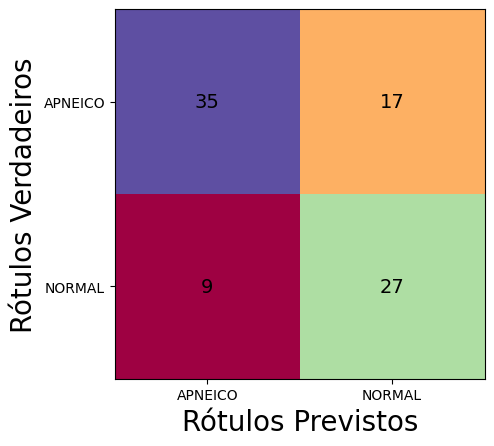

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y_t)
conf_matrix = confusion_matrix(y_t, predict, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

## Implementando o Algoritmo Genético

In [15]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd 
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
#Aqui eu estava erroneamente passando os dados de treinamento e não os dados novos, se eu passo os dados de treinamento posteriormente não faz sentido comparar com os dados novos

colunas_features = train_set.drop(columns=['CLASSE', 'IAH']).columns
individuos_iniciais = train_set[colunas_features].values.tolist()
classes_iniciais = train_set['CLASSE'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [17]:
colunas_features

Index(['T90', 'SATMIN', 'IDADE', 'ALTURA', 'PESO', 'IMC', 'PIP', 'W0', 'W1',
       'W2', 'W3', 'SYMB0V', 'SYMB1V', 'SYMB2LV', 'SYMB2UV', 'VLFABS', 'LFABS',
       'HFABS', 'LFNU', 'HFNU', 'LFHF', 'MEANRR', 'SDNN', 'RMSSD', 'DFA ',
       'SAMPEN', 'FUZZYEN', 'DISTEN', 'PERMEN', 'DISPEN', 'ATTEN', 'PHASEEN',
       'AC', 'DC', 'PORTAS', 'GUZIKS', 'EHLERS', 'BIN0V', 'BIN1V', 'BIN2V',
       'F', 'M'],
      dtype='object')

In [18]:
continuous = colunas_features
discrete=[]
class_name = 'CLASSE'
idx_features = colunas_features

min_vals = train_set[continuous].min().values
max_vals = train_set[continuous].max().values
print(min_vals, max_vals)

[ 0.00000000e+00  3.40000000e+01  1.90000000e+01  1.32000000e+00
  3.70000000e+01  1.64444444e+01  3.93232000e+01  3.78900000e-01
  6.32190000e+00  2.20120000e+01  1.25600000e+00  4.07400000e+00
  2.33674000e+01  8.04000000e-02  4.66840000e+00  4.90000000e+00
  5.29700000e-01  9.27900000e-01  9.58510000e+00  1.54330000e+00
  1.22700000e-01  5.74849700e+02  6.83360000e+00  2.15650000e+00
  3.56000000e-01  8.42900000e-01  6.87600000e-01  3.88400000e-01
  2.25900000e+00  3.14000000e+00  1.20500000e+00  6.92400000e-01
 -4.74267000e+01 -3.44520000e+00  4.24109000e+01  3.38057000e+01
 -2.38730000e+00  3.49760000e+00  3.26297000e+01  4.31130000e+00
  0.00000000e+00  0.00000000e+00] [ 1.00000000e+02  9.30000000e+01  8.00000000e+01  1.95000000e+00
  2.09000000e+02  7.40504535e+01  7.70383000e+01  1.89070000e+01
  6.98753000e+01  7.06150000e+01  4.50336000e+01  7.12194000e+01
  5.67064000e+01  3.28523000e+01  4.84680000e+01  1.26941832e+04
  4.58612150e+03  1.33676168e+04  9.84567000e+01  9.0414

In [19]:
idx_features.shape

(42,)

In [20]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [21]:
# x_referência=individuos_iniciais[0]
# x_teste=individuos_iniciais[1] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d)
# print(x0d)

In [22]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

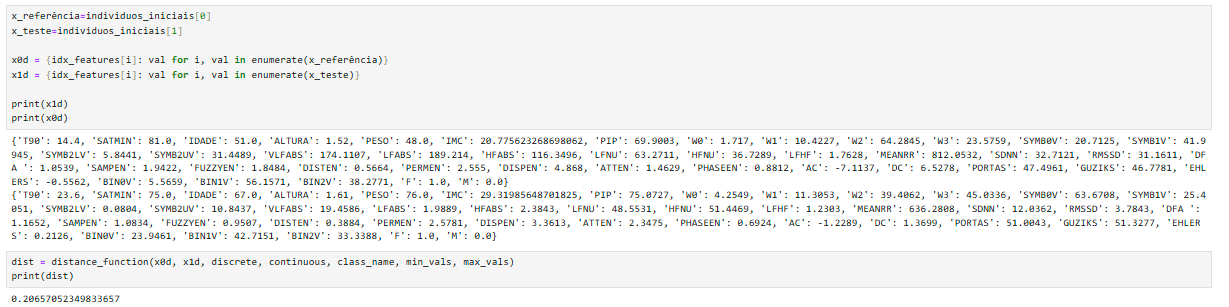

In [23]:
idx=5
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

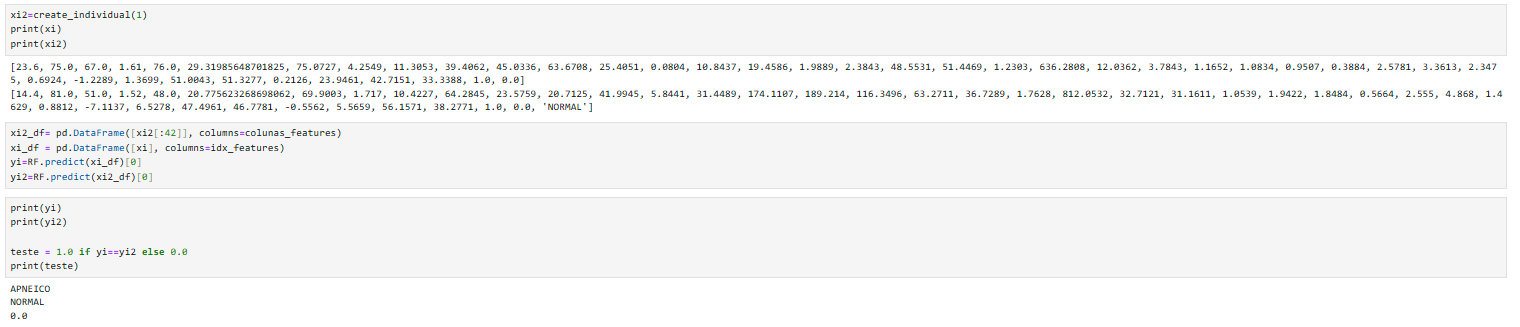

In [24]:
def fitness_sso_shared(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features,
                       distance_function, x1, population, sig=0.2, beta=1.0):
    # Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    # Previsão com DataFrame nomeado
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)

    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    # Similaridade de saída
    target_similarity = 1.0 if y0 == y1 else 0.0

    # Avaliação original (fitness antes do compartilhamento)
    raw_fitness_sso = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)

    # --- FITNESS SHARING ---
    def sharing_function(d, sig, beta):
        return 1 - (d / sig) ** beta if d < sig else 0.0

    # Calcular soma das funções de compartilhamento com os outros indivíduos da população
    sharing_sum = 0.0
    for other in population:
        other_d = {idx_features[i]: val for i, val in enumerate(other[:len(idx_features)])}
        dist = distance_function(x0d, other_d, discrete, continuous, class_name, min_vals, max_vals)
        sharing_sum += sharing_function(dist, sig, beta)

    # Garantir que não dividimos por zero
    if sharing_sum == 0.0:
        sharing_sum = 1.0

    shared_fitness = raw_fitness_sso / sharing_sum
    return shared_fitness,
    
def fitness_sdo_shared(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features,
                       distance_function, x1, population, sig=0.2, beta=1.0):
    # Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # Similaridade entre as instâncias
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    # Previsão com DataFrame nomeado
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)

    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    
    # Similaridade de saída
    target_similarity = 1.0 if y0 != y1 else 0.0

    # Avaliação original (fitness antes do compartilhamento)
    raw_fitness_sdo = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)

    # --- FITNESS SHARING ---
    def sharing_function(d, sig, beta):
        return 1 - (d / sig) ** beta if d < sig else 0.0

    # Calcular soma das funções de compartilhamento com os outros indivíduos da população
    sharing_sum = 0.0
    for other in population:
        other_d = {idx_features[i]: val for i, val in enumerate(other[:len(idx_features)])}
        dist = distance_function(x0d, other_d, discrete, continuous, class_name, min_vals, max_vals)
        sharing_sum += sharing_function(dist, sig, beta)

    # Garantir que não dividimos por zero
    if sharing_sum == 0.0:
        sharing_sum = 1.0

    shared_fitness = raw_fitness_sdo / sharing_sum
    return shared_fitness,

## Vou adicionar as funções de fitness DDO e DSO

In [25]:
# def fitness_dso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
#     # dissimilar_same_outcome
#     x0d = {idx_features[i]: val for i, val in enumerate(x0)}
#     x1d = {idx_features[i]: val for i, val in enumerate(x1)}

#     # zero if is too dissimilar
#     sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
#     record_similarity = 0.0 if sim_ratio <= eta else 1.0 - sim_ratio
    
#     #Previsão com DataFrame nomeado (evita warning)
#     x0_df = pd.DataFrame([x0], columns=idx_features)
#     x1_df = pd.DataFrame([x1], columns=idx_features)
#     y0 = bb.predict(x0_df)[0]
#     y1 = bb.predict(x1_df)[0]
    
#     target_similarity = 1.0 if y0 == y1 else 0.0
    
#     evaluation = alpha1 * record_similarity + alpha2 * target_similarity
#     return evaluation,


# def fitness_ddo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
#     # dissimilar_different_outcome
#     x0d = {idx_features[i]: val for i, val in enumerate(x0)}
#     x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
#     # zero if is too dissimilar
#     sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
#     record_similarity = 0.0 if sim_ratio <= eta else 1.0 - sim_ratio
    
#     #Previsão com DataFrame nomeado (evita warning)
#     x0_df = pd.DataFrame([x0], columns=idx_features)
#     x1_df = pd.DataFrame([x1], columns=idx_features)
#     y0 = bb.predict(x0_df)[0]
#     y1 = bb.predict(x1_df)[0]
    
#     target_similarity = 1.0 if y0 != y1 else 0.0
    
#     evaluation = alpha1 * record_similarity + alpha2 * target_similarity
#     return evaluation,

In [26]:
#Reprodução, crossover do tipo aritmético
def Crossover_func(ind1, ind2, alpha=0.5, cx_prob=0.5):
    if random.random() < 1:
        for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
            gamma = (1. + 2. * alpha) * random.random() - alpha
            ind1[i] = (1. - gamma) * x1 + gamma * x2
            ind2[i] = gamma * x1 + (1. - gamma) * x2
        
        # Manter a classe original dos indivíduos sem alterar
        ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
        ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
        
        return ind1, ind2
    else:
        return ind1, ind2

In [27]:
# ind1 = [10, 20, 30, 40]
# ind2 = [1, 2, 3, 4]
# zip(ind1[:-1], ind2[:-1]) → [(10, 1), (20, 2), (30, 3)]

# list(enumerate(zip(ind1[:-1], ind2[:-1]))) →
# [
#   (0, (10, 1)),
#   (1, (20, 2)),
#   (2, (30, 3))
# ]

In [28]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [29]:
# print('individuo 1', ind1_test, end='\n\n')
# print('individuo 2', ind2_test, end='\n\n')
# cxpb=0.9
# ind1_cros, ind2_cros = Crossover_func(ind1_test, ind2_test,alpha=0.5)
# print('individuo 1 crossover', ind1_cros, end='\n\n')
# print('individuo 2 crossover', ind2_cros)

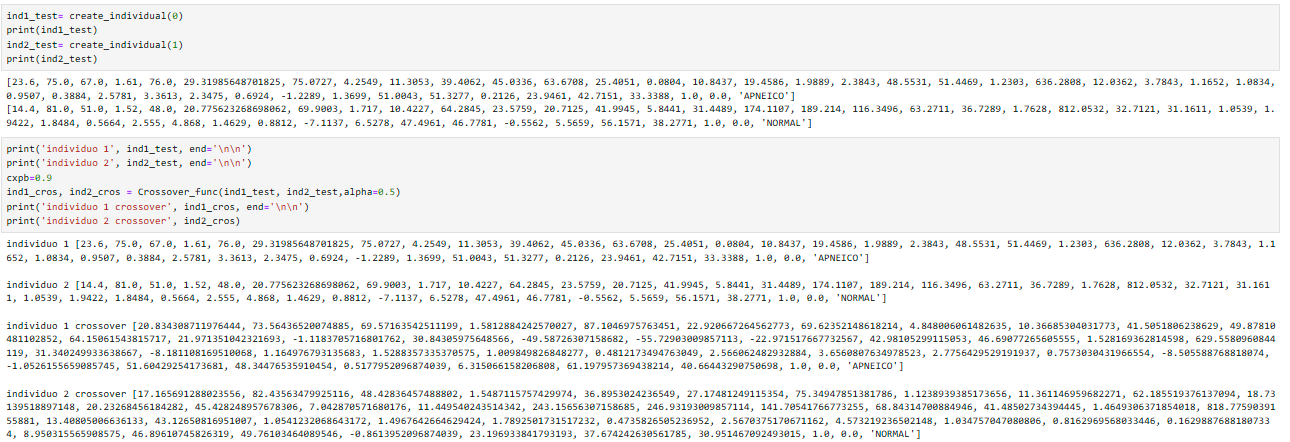

In [30]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão
def mutGaussianWithoutClass(individual, mu, sigma, mutpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < 1:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [31]:
# ind1_test= create_individual(0)
# print(ind1_test)
# ind2_test= create_individual(1)
# print(ind2_test)

In [32]:
# ind1_mut=mutGaussianWithoutClass(ind1_test[:-1], 0, 1, 0.8, min_vals=min_vals, max_vals=max_vals)
# print(ind1_mut)

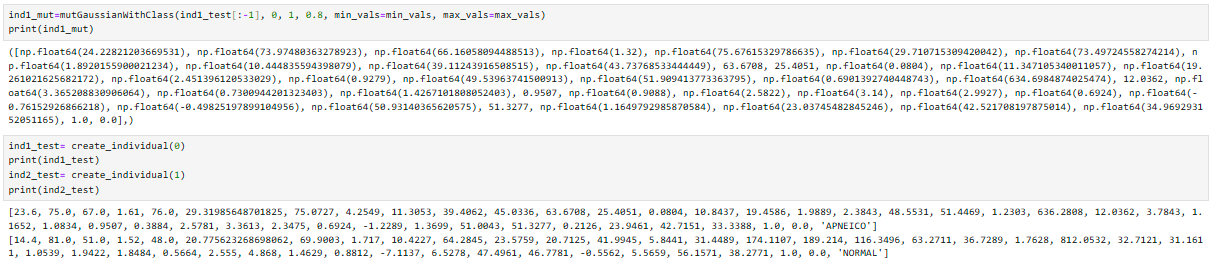

In [33]:
#Criando indivíduos que estão próximos e resultam numa mesma classe SSO
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 1
    alpha2 = 1
    eta = 0.9
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sso_shared(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi, population, sig=0.2, beta=1.0)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

population = toolbox.population(n=500)
# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.5  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_SSO = [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_SSO}")

Melhor indivíduo: [np.float64(0.6260491035928929), np.float64(86.80269695312322), np.float64(48.62086073677727), np.float64(1.3207454934356044), np.float64(100.30510052920413), np.float64(33.20548393382154), np.float64(54.95585486426412), np.float64(10.251032155693142), np.float64(29.63899226976715), np.float64(46.02244279753617), np.float64(13.722158568911127), np.float64(58.685015090618414), np.float64(28.699174793169433), np.float64(2.1160480817418326), np.float64(7.644794516757782), np.float64(454.6337796284158), np.float64(142.01207493673974), np.float64(42.43314693317181), np.float64(76.33730240651012), np.float64(24.805072714073344), np.float64(4.272497392944182), np.float64(940.9760754450028), np.float64(39.868677890437674), np.float64(14.32798736347566), np.float64(0.37203104256992164), np.float64(3.7101812941470893), np.float64(1.2392316590033379), np.float64(1.832436661441469), np.float64(2.206068989713262), np.float64(9.488439449217235), np.float64(2.955239733945773), np.fl

In [34]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente SDO
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.5
    eta = 0.9
    discrete = []
    continuous = colunas_features
    class_name = 'CLASSE'
    idx_features = colunas_features
    # Avaliar usando a função de fitness fornecida
    return fitness_sdo_shared(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi, population, sig=0.2, beta=1.0)
# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial
population = toolbox.population(n=500)

# Parâmetros do algoritmo
ngen = 10 # Número de gerações
cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_SDO= [ind[:42] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_SDO}")

Melhor indivíduo: [np.float64(1.6871066675222504), np.float64(89.52428359076488), np.float64(49.85206526812456), np.float64(1.6656851292629973), np.float64(97.90717699945004), np.float64(31.560183705567926), np.float64(54.61572227991094), np.float64(6.92652951167994), np.float64(34.547208011400784), np.float64(42.83365031668738), np.float64(18.37636439341042), np.float64(54.6692742962223), np.float64(35.1937713965848), np.float64(3.7192870832197533), np.float64(6.929580805915073), np.float64(456.4240753815146), np.float64(144.02513747726715), np.float64(41.44550661492876), np.float64(75.32943038289777), np.float64(24.164030347936738), np.float64(4.103309292611885), np.float64(940.6852049824258), np.float64(43.24267893543748), np.float64(12.932023358767276), np.float64(-0.35699920662382356), np.float64(0.40067319288421555), np.float64(0.868017643595095), np.float64(0.009500236000321127), np.float64(2.7746758096621096), np.float64(3.0631007716989602), np.float64(1.3300468413933548), np.f

In [35]:
# #Criando indivíduos que estão próximos mas resultam em um classe diferente DSO
# individuo_inicial = individuos_iniciais[idx] 
# xi=individuo_inicial

# def evaluate(individual):
#     # Parâmetros da função de fitness (exemplo)
#     alpha1 = 0.5
#     alpha2 = 1
#     eta = 0.1
#     discrete = []
#     continuous = colunas_features
#     class_name = 'CLASSE'
#     idx_features = colunas_features
#     # Avaliar usando a função de fitness fornecida
#     return fitness_dso(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# # Configuração da toolbox
# toolbox = base.Toolbox()
# toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
# toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# # Criar a população inicial
# population = toolbox.population(n=250)

# # Parâmetros do algoritmo
# ngen = 10 # Número de gerações
# cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# # Executa o algoritmo genético
# result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# # Exibir o melhor resultado
# best_individual = tools.selBest(population, 1)[0]
# print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# # Filtrar e armazenar os novos indivíduos gerados
# novos_individuos_DSO= [ind[:42] for ind in population]  # Pegando apenas as características

# print(f"Novos indivíduos gerados: {novos_individuos_DSO}")

In [36]:
# #Criando indivíduos que estão próximos mas resultam em um classe diferente DDO
# individuo_inicial = individuos_iniciais[idx] 
# xi=individuo_inicial

# def evaluate(individual):
#     # Parâmetros da função de fitness (exemplo)
#     alpha1 = 0.5
#     alpha2 = 1
#     eta = 0.1
#     discrete = []
#     continuous = colunas_features
#     class_name = 'CLASSE'
#     idx_features = colunas_features
#     # Avaliar usando a função de fitness fornecida
#     return fitness_ddo(individual[:42], RF, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi)

# # Configuração da toolbox
# toolbox = base.Toolbox()
# toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# toolbox.register("mate", Crossover_func, alpha=0.5, cx_prob=0.5)
# toolbox.register("mutate", mutGaussianWithoutClass, mu=0, sigma=1, mutpb=0.5)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# # Criar a população inicial
# population = toolbox.population(n=250)

# # Parâmetros do algoritmo
# ngen = 10 # Número de gerações
# cxpb, mutpb = 0.5, 0.5 # Dento do eaSimple

# # Executa o algoritmo genético
# result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# # Exibir o melhor resultado
# best_individual = tools.selBest(population, 1)[0]
# print(f"Melhor indivíduo: {best_individual[:-1]}, Fitness: {best_individual.fitness.values}")

# # Filtrar e armazenar os novos indivíduos gerados
# novos_individuos_DDO= [ind[:42] for ind in population]  # Pegando apenas as características

# print(f"Novos indivíduos gerados: {novos_individuos_DDO}")

In [37]:
SSO=pd.DataFrame(novos_individuos_SSO)
SDO=pd.DataFrame(novos_individuos_SDO)
#DDO=pd.DataFrame(novos_individuos_DDO)
#DSO=pd.DataFrame(novos_individuos_DSO)
SSO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.385196,89.049690,47.695719,1.950000,101.218389,27.446256,56.737191,7.086801,35.211722,41.728972,...,-5.378852,5.092614,51.678544,55.160869,-2.049198,28.793458,53.538453,20.176837,0.559455,1.000000
1,0.000000,88.017619,50.284609,1.595494,100.373430,29.160871,58.823043,7.689551,34.485279,41.935763,...,-5.530389,4.921557,49.800758,51.365000,-0.858675,25.005526,55.144516,17.971260,0.372476,0.000000
2,0.213338,93.000000,49.060543,1.818122,97.379583,23.971841,56.964545,3.823011,35.538296,46.939380,...,-2.049346,4.996005,53.476222,51.431017,-2.387300,22.443991,59.293477,17.383112,0.199866,0.000000
3,2.237860,88.801245,46.718063,0.934020,98.305813,21.241538,64.300200,5.776575,37.503986,45.288281,...,-3.970080,6.874721,45.872048,53.715155,0.948068,28.830465,51.939524,19.389399,-0.648639,0.137272
4,2.245485,88.494667,49.452719,1.943021,96.593894,30.455546,55.748497,11.086195,35.854508,42.319647,...,-7.357924,0.391389,49.768561,53.433912,-0.535943,26.289325,56.563573,21.905454,-0.770091,1.070683


In [38]:
SDO.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.929542,86.542764,49.504386,1.475967,95.605442,31.869718,55.256290,4.668255,33.331400,44.790914,...,-9.948047,2.737961,45.818566,52.006310,-1.911698,24.899748,58.858883,17.076275,0.000000,0.506731
1,3.576610,91.063347,47.788147,1.950000,100.698732,30.631677,51.533214,6.489923,36.092704,47.700043,...,-9.162385,6.164633,48.925244,53.579485,2.537115,23.465395,57.408769,13.763251,0.000000,1.000000
2,4.579491,85.532327,46.100348,1.278885,98.534512,30.399365,55.270575,6.471271,40.561239,43.179049,...,-2.575433,1.551202,50.880127,50.759048,0.314953,28.607475,56.074775,14.553464,1.035960,0.973159
3,0.404201,82.431375,40.111322,1.950000,96.947433,31.894097,49.503394,3.369451,33.227496,40.588065,...,-7.021718,0.426255,50.090777,49.700738,-0.569781,26.743019,57.567044,17.668381,1.000000,0.234713
4,1.207604,86.631733,49.586229,1.362785,96.571551,28.303957,55.536607,9.535268,35.869777,42.348271,...,-7.268589,6.408597,45.928845,44.456432,2.980884,28.692235,54.184429,19.139280,-0.146067,0.790694


In [39]:
#DDO.head()

In [40]:
#DSO.head()

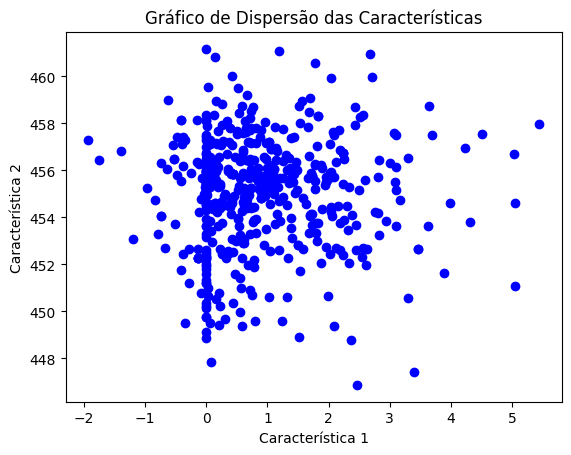

In [41]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[15], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

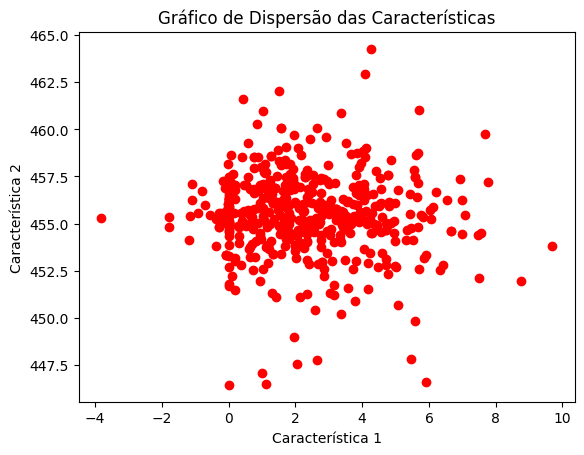

In [42]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[15], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [43]:
print(xi)

[0.1, 89.0, 48.0, 1.83, 99.0, 29.56194571351787, 55.0404, 7.8663, 34.2416, 42.7749, 15.1172, 55.2466, 36.39, 1.5441, 6.8193, 455.5005, 140.9598, 41.6113, 74.8181, 25.1819, 3.3932, 940.8828, 41.1181, 12.6073, 1.5935, 1.5317, 1.0143, 0.5895, 2.4482, 3.6933, 2.4551, 0.9129, -6.2592, 4.5254, 50.209, 51.9575, 0.9313, 27.1667, 54.967, 17.8663, 0.0, 1.0]


In [44]:
XSSO=SSO.iloc[:, :42].values
XSDO=SDO.iloc[:, :42].values
#XDDO=DDO.iloc[:, :42].values
#XDSO=DSO.iloc[:, :42].values

In [45]:
XTOTAL = pd.concat([SSO, SDO], ignore_index=True)
XTOTAL.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.385196,89.049690,47.695719,1.950000,101.218389,27.446256,56.737191,7.086801,35.211722,41.728972,...,-5.378852,5.092614,51.678544,55.160869,-2.049198,28.793458,53.538453,20.176837,0.559455,1.000000
1,0.000000,88.017619,50.284609,1.595494,100.373430,29.160871,58.823043,7.689551,34.485279,41.935763,...,-5.530389,4.921557,49.800758,51.365000,-0.858675,25.005526,55.144516,17.971260,0.372476,0.000000
2,0.213338,93.000000,49.060543,1.818122,97.379583,23.971841,56.964545,3.823011,35.538296,46.939380,...,-2.049346,4.996005,53.476222,51.431017,-2.387300,22.443991,59.293477,17.383112,0.199866,0.000000
3,2.237860,88.801245,46.718063,0.934020,98.305813,21.241538,64.300200,5.776575,37.503986,45.288281,...,-3.970080,6.874721,45.872048,53.715155,0.948068,28.830465,51.939524,19.389399,-0.648639,0.137272
4,2.245485,88.494667,49.452719,1.943021,96.593894,30.455546,55.748497,11.086195,35.854508,42.319647,...,-7.357924,0.391389,49.768561,53.433912,-0.535943,26.289325,56.563573,21.905454,-0.770091,1.070683


In [46]:
print("XTOTAL shape:", XTOTAL.shape)
print("df.columns[2:] length:", len(df.columns[2:]))

XTOTAL shape: (1000, 42)
df.columns[2:] length: 42


In [47]:
XTOTAL_df = pd.DataFrame(XTOTAL.to_numpy(), columns=df.columns[2:])
XTOTAL_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,1.385196,89.049690,47.695719,1.950000,101.218389,27.446256,56.737191,7.086801,35.211722,41.728972,...,-5.378852,5.092614,51.678544,55.160869,-2.049198,28.793458,53.538453,20.176837,0.559455,1.000000
1,0.000000,88.017619,50.284609,1.595494,100.373430,29.160871,58.823043,7.689551,34.485279,41.935763,...,-5.530389,4.921557,49.800758,51.365000,-0.858675,25.005526,55.144516,17.971260,0.372476,0.000000
2,0.213338,93.000000,49.060543,1.818122,97.379583,23.971841,56.964545,3.823011,35.538296,46.939380,...,-2.049346,4.996005,53.476222,51.431017,-2.387300,22.443991,59.293477,17.383112,0.199866,0.000000
3,2.237860,88.801245,46.718063,0.934020,98.305813,21.241538,64.300200,5.776575,37.503986,45.288281,...,-3.970080,6.874721,45.872048,53.715155,0.948068,28.830465,51.939524,19.389399,-0.648639,0.137272
4,2.245485,88.494667,49.452719,1.943021,96.593894,30.455546,55.748497,11.086195,35.854508,42.319647,...,-7.357924,0.391389,49.768561,53.433912,-0.535943,26.289325,56.563573,21.905454,-0.770091,1.070683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.112846,86.920541,47.067448,1.950000,97.829995,30.805609,52.976369,6.593602,37.065104,44.027443,...,-10.524565,2.912763,54.895316,56.641515,-1.661701,27.311207,53.827083,16.014573,0.394970,0.000000
996,-1.792553,86.656162,48.664423,2.035619,98.137089,29.740221,54.363557,7.347587,33.633317,38.596419,...,-9.922596,0.890712,48.409922,53.985665,-0.981730,26.720796,55.582492,17.700429,0.985088,-0.904258
997,7.460044,87.149346,50.981345,1.322578,101.477839,27.733474,45.966019,7.908528,34.092709,42.473908,...,-10.933608,3.721498,45.698279,54.306089,0.232042,27.564516,57.123184,21.182201,0.596448,1.000000
998,3.376018,89.986652,48.759251,1.950000,101.735159,22.507841,55.388542,7.224929,34.241873,44.713123,...,-5.147499,2.981324,47.669271,55.277168,-0.688220,23.514782,56.899548,15.241220,1.000000,0.000000


In [48]:
#Ainda tem alguma coisa errada, ele esta prevendo todos como APNEICO

In [49]:
ytotal= RF.predict(XTOTAL_df)
pd.Series(ytotal).value_counts()

NORMAL     604
APNEICO    396
Name: count, dtype: int64

In [50]:
import pandas as pd
y_series = pd.Series(ytotal, name="label")
dfb= XTOTAL_df.copy()
dfb["label"] = y_series

# Descobre o tamanho da menor classe
min_count = y_series.value_counts().min()

# Balanceia o conjunto
balanced_df = dfb.groupby("label").sample(n=min_count, random_state=42)
print(balanced_df)

# Separa novamente X e y
Xb = balanced_df.drop(columns="label")
yb = balanced_df["label"] 

          T90     SATMIN      IDADE    ALTURA        PESO        IMC  \
527  4.314421  84.120505  47.035249  1.320000   98.644203  30.240679   
832  4.560829  89.916502  41.035310  2.252258   92.787809  30.416277   
789  5.923674  85.181900  46.179024  1.950000   97.968351  30.161459   
456  3.102999  92.417489  43.978951  1.950000  100.140874  26.157708   
993  0.000000  84.924460  48.092035  1.950000  100.835528  25.674531   
..        ...        ...        ...       ...         ...        ...   
440  0.517978  90.536449  48.662392  1.950000  100.168850  30.479498   
0    1.385196  89.049690  47.695719  1.950000  101.218389  27.446256   
682  0.186865  87.914533  51.021407  1.205493   97.937837  30.210243   
435  0.155980  89.143621  45.932282  1.594814   99.770951  31.204240   
358  0.000000  88.817165  46.625839  1.358655   99.396457  29.376089   

           PIP         W0         W1         W2  ...        DC     PORTAS  \
527  57.042346   3.952522  33.076704  41.474234  ... -0.90

In [51]:
yb.value_counts()

label
APNEICO    396
NORMAL     396
Name: count, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(Xb, yb)

DecisionTreeClassifier(max_depth=15, random_state=42)

## Implementando a Árvore de Decisão

In [53]:
xi = np.array(xi).reshape(1, -1)
xi_df = pd.DataFrame(xi, columns=colunas_features)
print(xi_df)

   T90  SATMIN  IDADE  ALTURA  PESO        IMC      PIP      W0       W1  \
0  0.1    89.0   48.0    1.83  99.0  29.561946  55.0404  7.8663  34.2416   

        W2  ...      AC      DC  PORTAS   GUZIKS  EHLERS    BIN0V   BIN1V  \
0  42.7749  ... -6.2592  4.5254  50.209  51.9575  0.9313  27.1667  54.967   

     BIN2V    F    M  
0  17.8663  0.0  1.0  

[1 rows x 42 columns]


In [54]:
Explicando=ClassificadorDT.predict(xi_df)
print(Explicando)

['NORMAL']


In [55]:
predicT=RF.predict(X_T)
print(predicT[5])

NORMAL


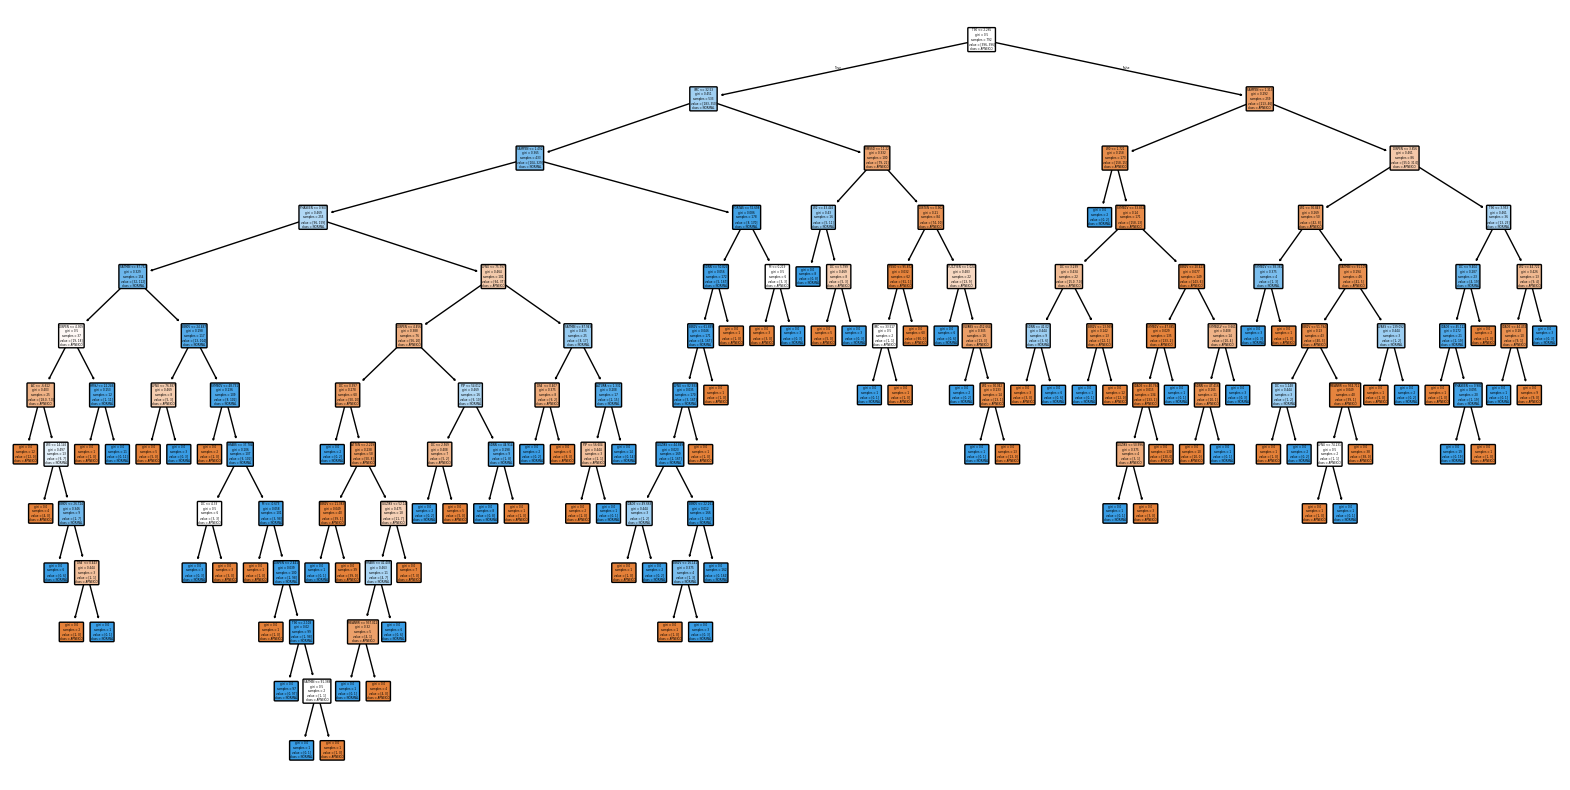

In [56]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(ClassificadorDT, filled=True, feature_names=colunas_features, class_names=classes_iniciais, rounded=True)
plt.savefig("arvore_decisao.png", dpi=300, bbox_inches='tight')  # salva como PNG com boa resolução
plt.show()

In [57]:
print("\nPor que o indivíduo foi classificado como:", Explicando, '?')

node_indicator = ClassificadorDT.decision_path(xi_df)
node_index = node_indicator.indices
print("\nPorque o seguintes nós foram percorridos para essa amostra:")

thresholds = ClassificadorDT.tree_.threshold
features = ClassificadorDT.tree_.feature
children_left = ClassificadorDT.tree_.children_left
children_right = ClassificadorDT.tree_.children_right

explicacoes_nos = []

for node_id in node_index:
    f_index = features[node_id]      # índice da feature usada no nó
    thresh = thresholds[node_id]     # limiar do nó

    if f_index >= 0:
        val = xi[0][f_index]
        feature_name = xi_df.columns[f_index]
        cond = "SATISFEITA" if val <= thresh else "NÃO SATISFEITA"
        explicacao = f"Nó {node_id}: {feature_name} = {val:.3f}, condição testada: {feature_name} <= {thresh:.3f} → {cond}"
    else:
        explicacao = f"Nó {node_id}: folha alcançada, o indivíduo é: {Explicando}"

    print(explicacao)
    explicacoes_nos.append(explicacao)


Por que o indivíduo foi classificado como: ['NORMAL'] ?

Porque o seguintes nós foram percorridos para essa amostra:
Nó 0: T90 = 0.100, condição testada: T90 <= 2.265 → SATISFEITA
Nó 1: IMC = 29.562, condição testada: IMC <= 32.530 → SATISFEITA
Nó 2: SAMPEN = 1.532, condição testada: SAMPEN <= 1.492 → NÃO SATISFEITA
Nó 68: PORTAS = 50.209, condição testada: PORTAS <= 55.698 → SATISFEITA
Nó 69: SDNN = 41.118, condição testada: SDNN <= 50.825 → SATISFEITA
Nó 70: BIN1V = 54.967, condição testada: BIN1V <= 61.839 → SATISFEITA
Nó 71: LFNU = 74.818, condição testada: LFNU <= 82.933 → SATISFEITA
Nó 72: GUZIKS = 51.958, condição testada: GUZIKS <= 44.849 → NÃO SATISFEITA
Nó 76: BIN0V = 27.167, condição testada: BIN0V <= 22.261 → NÃO SATISFEITA
Nó 80: folha alcançada, o indivíduo é: ['NORMAL']


In [58]:
#Decision_path retorna uma matriz esparsa, 
#Um objeto do tipo scipy.sparse.csr_matrix com forma (n_samples, n_nodes), onde:
#n_samples é o número de amostras em xi (conjunto de dados que queremos os caminhos percorridos, no nosso caso é apenas um indivíduo).
#n_nodes é o número total de nós na árvore.
#Se node_indicator[i, j] = 1, significa que a amostra i passou pelo nó j.

In [59]:
def get_decision_path(ClassificadorDT, xi_df, feature_names):
    """
    Retorna um dicionário com os nós percorridos e as decisões tomadas.
    """
    node_indicator = ClassificadorDT.decision_path(xi_df)
    leaf_id = ClassificadorDT.apply(xi_df)[0]  # Nó final

    feature = ClassificadorDT.tree_.feature
    threshold = ClassificadorDT.tree_.threshold

    decision_dict = {}
    xi_array = xi_df.values  # para acessar os valores numéricos

    for node_id in node_indicator.indices:
        if leaf_id == node_id:
            decision_dict[f"Nó {node_id}"] = "Folha"
        else:
            feature_index = feature[node_id]
            threshold_value = threshold[node_id]
            feature_name = feature_names[feature_index]
            sample_value = xi_array[0, feature_index]  # aqui pode usar vírgula

            decision = f"{feature_name} <= {threshold_value}" if sample_value <= threshold_value else f"{feature_name} > {threshold_value}"
            decision_dict[f"Nó {node_id}"] = decision

    return decision_dict

feature_names_exp = colunas_features
Explicação = get_decision_path(ClassificadorDT, xi_df, feature_names_exp)
print(Explicação)

{'Nó 0': 'T90 <= 2.264622211456299', 'Nó 1': 'IMC <= 32.52980995178223', 'Nó 2': 'SAMPEN > 1.4920390844345093', 'Nó 68': 'PORTAS <= 55.69804573059082', 'Nó 69': 'SDNN <= 50.824567794799805', 'Nó 70': 'BIN1V <= 61.838924407958984', 'Nó 71': 'LFNU <= 82.93259811401367', 'Nó 72': 'GUZIKS > 44.84945297241211', 'Nó 76': 'BIN0V > 22.261215209960938', 'Nó 80': 'Folha'}
